<a href="https://colab.research.google.com/github/hBharish/DARM/blob/DARM-MAIN/DARM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Importing the dataset

In [ ]:
dataset = pd.read_csv('SimulationData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Data Encoding


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y.reshape(-1, 1)).toarray()

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Random Forest Classification model on the Training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting a new result

In [ ]:
print(classifier.predict(sc.transform([[20,5.722222222,0.05555555556,0.2777777778,1.612345679,1104.166049,27.49669037,0.5555555556,1.447191557,0.1196822556,10.78511765,1.99869693,14.35068839,12,8]])))


['Hello Flood Attack']


## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['Hello Flood Attack' 'Hello Flood Attack']
 ['Blackhole Attack' 'Blackhole Attack']
 ['Not under attack' 'Not under attack']
 ['Not under attack' 'Not under attack']
 ['Blackhole Attack' 'Blackhole Attack']
 ['Version Number Attack' 'Version Number Attack']
 ['Not under attack' 'Not under attack']
 ['Blackhole Attack' 'Blackhole Attack']
 ['Hello Flood Attack' 'Hello Flood Attack']
 ['Hello Flood Attack' 'Hello Flood Attack']
 ['Not under attack' 'Not under attack']
 ['Hello Flood Attack' 'Hello Flood Attack']
 ['Version Number Attack' 'Version Number Attack']
 ['Hello Flood Attack' 'Hello Flood Attack']
 ['Blackhole Attack' 'Blackhole Attack']
 ['Hello Flood Attack' 'Hello Flood Attack']
 ['Blackhole Attack' 'Blackhole Attack']
 ['Hello Flood Attack' 'Hello Flood Attack']
 ['Blackhole Attack' 'Blackhole Attack']
 ['Not under attack' 'Not under attack']
 ['Version Number Attack' 'Version Number Attack']
 ['Hello Flood Attack' 'Hello Flood Attack']
 ['Version Number Attack' 'Version N

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


Confusion Matrix:
[[17  0  0  0]
 [ 2 19  0  0]
 [ 0  0 18  0]
 [ 0  0  1 10]]
Accuracy: 0.9552238805970149
Precision: 0.9591516103692065
Recall: 0.9552238805970149
F1 Score: 0.9551531275411873


In [ ]:
import seaborn as sns
np.random.seed(0)
columns = [f'var{i+1}' for i in range(15)] + ['dependent_variable']
data = pd.DataFrame(np.random.randn(100, 16), columns=columns)

In [ ]:
correlation_matrix = data.corr()


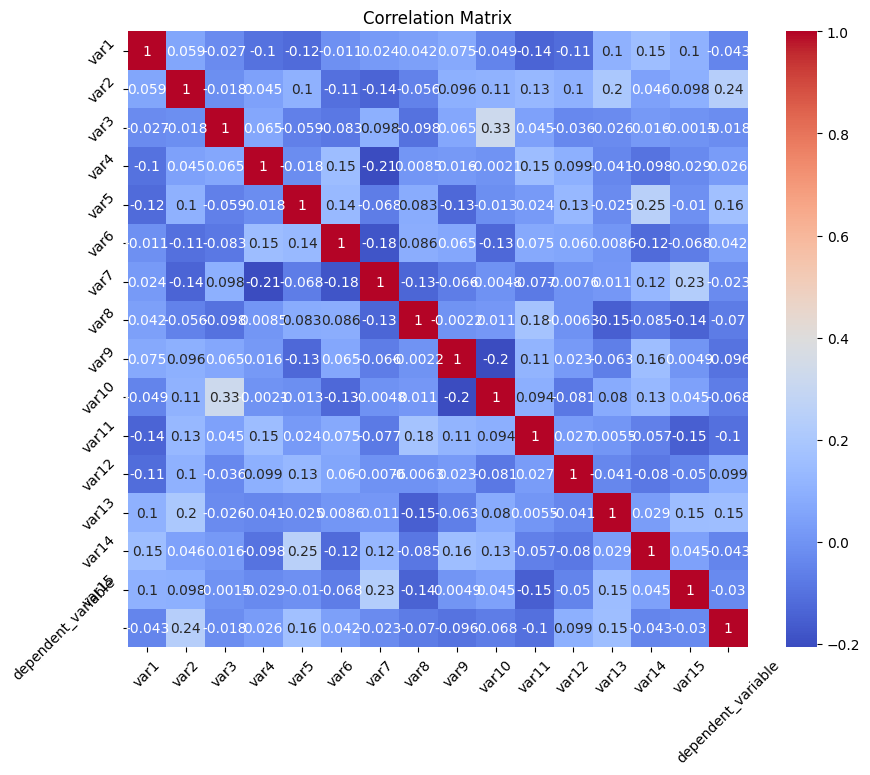

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=data.columns, yticklabels=data.columns)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()